In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math


#데이터 읽기
f1 = open('x_c1.csv', 'r', encoding = 'UTF-8-SIG')
f2 = open('x_c2.csv', 'r', encoding = 'UTF-8-SIG')
read_f1 = csv.reader(f1)
read_f2 = csv.reader(f2)

x1 = []
x2 = []

#[bias, row, col]로 데이터가 저장. 그래프에 데이터가 표현이 될 때는 row, col로 표현이 됨.
for col in read_f1:
    x1.append([1, float(col[0]), float(col[1])])
for col in read_f2:
    x2.append([1, float(col[0]), float(col[1])])

#x_c1.csv의 레이블은 -1, x_c2.csv의 레이블은 1
y_tmp1 = [-1 for i in range(0, 20)]
y_tmp2 = [1 for i in range(0, 20) ]
y = []
y.append(y_tmp1)
y.append(y_tmp2)    

#x = [x1, x2]
x = []
x.append(x1)
x.append(x2)

#랜덤한 가중치 값 초기 설정
w = []
for i in range(3): 
    num = random.uniform(0,1)
    w.append(num);

n_epoch = 300
eta = 0.001
  
f1.close()
f2.close()

In [2]:
#데이터를 뿌려주는(그리는) 함수
def drawData(x_c1, x_c2):
    tmp_x = []
    tmp_y = []
    for i in range(20):
        tmp_x.append(x_c1[i][1])
        tmp_y.append(x_c1[i][2])
    plt.plot(tmp_x, tmp_y, '+b')
    
    tmp_x = []
    tmp_y = []
    for i in range(20):
        tmp_x.append(x_c2[i][1])
        tmp_y.append(x_c2[i][2])
    plt.plot(tmp_x, tmp_y, 'or')

In [3]:
#그래프를 뿌려주는(그리는) 함수
def drawGraph(w):
    graph_x = []
    graph_y = []
    
    num = -5.0
    while True:
        if num >= 10:
            break
        graph_x.append(num)
        num += 0.1
    
    for i in range(len(graph_x)):
        temp =  - (w[0] / w[2]) - ((w[1] / w[2]) * graph_x[i])
        graph_y.append(temp)  
    
    plt.plot(graph_x, graph_y, 'k')

In [4]:
def Perceptron_mis_yx(y,x,w,n_epoch,eta):
    #각 레이블에 대한 샘플의 개수이다.
    #-1레이블 20개, 1레이블 20개라 n_sample은 20을 나타냄
    n_sample = len(y[0]) / 2;
    #x_c1은 레이블이 -1인 데이터, x_c2는 레이블이 1인 데이터
    x_c1 = x[0]
    x_c2 = x[1]
    
    #y는 -1, 1을 가짐
    #각 데이터에 대해 레이블 값을 곱해준 결과가 yx임
    #x_c1에는 -1을 곱해 yx에 넣고 x_c2에는 1d르 곱해 yx에 넣음
    yx = []
    for i in range(20):
        yx.append(np.multiply(x_c1[i], y[0][0]))
    for i in range(20):
        yx.append(np.multiply(x_c2[i], y[1][0]))
    
    print('----- Perceptron_mis_yx() started -----') 
    for e in range(n_epoch):
        wyx = []
        
        #각 수행 마다 그래프를 그려준다
        drawGraph(w)
        #wyx는 기존에 구한 yx에 w값을 내적한 값이 들어감
        for i in range(40):
            wyx.append(yx[i][0] * w[0] + yx[i][1] * w[1] + yx[i][2] * w[2])
            
        yx_misclassified = []
        
        err = 0
        
        #데이터가 x_c1 20개, x_c2 20개라 40번 돌림
        for i in range(40):
            #가중치와 yx값의 내적이 음수라면 이게 에러
            #가중치와 yx값의 내적이 음수가 나오면 안됨
            #err는 내적이 음수가 나온 yx의 개수
            if wyx[i] < 0:
                err += 1
                #내적 결과가 음수가 나온 yx값을 따로 모아준다
                yx_misclassified.append(yx[i])
        
        #에러가 난 yx값을 모두 가중치에 더해줌
        w = np.sum(yx_misclassified, axis = 0) + w
        print('err = %d' %(err))
        
        if err == 0:
            break
    
    #마지막에 데이터 한번 뿌려주고 좌표평면 결과를 보여줌
    drawData(x_c1, x_c2)
    plt.show()           
        

In [5]:
def Perceptron_l2(y,x,w,n_epoch,eta):
    #각 레이블에 대한 샘플의 개수이다.
    #-1레이블 20개, 1레이블 20개라 n_sample은 20을 나타냄
    n_sample = len(y[0]) / 2;
    #x_c1은 레이블이 -1인 데이터, x_c2는 레이블이 1인 데이터
    x_c1 = x[0]
    x_c2 = x[1]
    
    print('----- Perceptron_l2() started -----')   
    for e in range(n_epoch):
        wx = []
        drawGraph(w)
        
        #wx는 가중치와 데이터 자체인 x의 내적 값이 들어간다.
        for i in range(20):
            wx.append(x[0][i][0] * w[0] + x[0][i][1] * w[1] + x[0][i][2] * w[2])
        for i in range(20):
            wx.append(x[1][i][0] * w[0] + x[1][i][1] * w[1] + x[1][i][2] * w[2])
        
        diff = []   
        
        #레이블 -1에 대해 (레이블 값 - w와 x의 내적 값)과 거기에 해당하는 데이터를 곱함.
        for i in range(20):
            diff.append(np.multiply((y[0][0] - wx[i]),x[0][i]))
        #레이블 1에 대해 (레이블 값 - w와 x의 내적 값)과 거기에 해당하는 데이터를 곱함.
        for i in range(20):
            diff.append(np.multiply((y[1][0] - wx[i+20]),x[1][i]))

        #diff를 모두 더한 값 * eta로 w를 업데이트
        w = eta * np.sum(diff, axis = 0) + w
 
        err1 = 0.0
        err2 = 0
        
        #레이블 -1에 대해 에러를 계산
        for i in range(20):
            tmp = y[0][0] - wx[i]
            err1 += (0.5 * (tmp**2))
            
            if y[0][0] * wx[i] < 0:
                err2 += 1
        
        #레이블 1에 대해 에러를 계산
        for i in range(20,40):
            tmp = y[1][0] - wx[i]
            err1 += (0.5 * (tmp**2))
            
            if y[1][0] * wx[i] < 0:
                err2 += 1
            
        print('err(%d) = %f %d' % (e+1, err1, err2))
               
        if err2 == 0:
            break
    
    #마지막에 데이터 한번 뿌려주고 좌표평면 결과를 보여줌
    drawData(x_c1, x_c2)
    plt.show()
    

In [6]:
def SVM(y, x, w, epoch, eta):
    #각 레이블에 대한 샘플의 개수이다.
    #-1레이블 20개, 1레이블 20개라 n_sample은 20을 나타냄
    n_sample = len(y[0]) / 2;
    #x_c1은 레이블이 -1인 데이터, x_c2는 레이블이 1인 데이터
    x_c1 = x[0]
    x_c2 = x[1]
    lamda = 0.01
    
    #yx는 레이블 값인 y와 데이터 값인 x의 곱
    yx = []
    for i in range(20):
        yx.append(np.multiply(x_c1[i], y[0][0]))
    for i in range(20):
        yx.append(np.multiply(x_c2[i], y[1][0]))
    
    
    for e in range(epoch):
        drawGraph(w)
        wyx = []
        
        #w와 기존에 구한 yx를 내적시킨 결과를 wyx에 넣음
        for i in range(40):
            wyx.append(yx[i][0] * w[0] + yx[i][1] * w[1] + yx[i][2] * w[2])
        
        err_idx = []
        
        #wyx가 1미만인 것들에 대해 해당하는 인덱스를 err_idx에 넣음
        for i in range(40):
            if wyx[i] < 1:
                err_idx.append(i)
        
        tmp = [0, 0, 0]

        #tmp는 err_idx에 해당하는 yx값들의 총 합을 나타냄.
        for i in range(len(err_idx)):
            tmp[0] += yx[err_idx[i]][0]
            tmp[1] += yx[err_idx[i]][1]
            tmp[2] += yx[err_idx[i]][2]
        
        #가중치 업데이트
        w =  w + eta*(np.multiply((-2*lamda*(n_sample*2)), w) + tmp)  
        
        err1 = 0.0
        err2 = 0
        
        #에러 업데이트
        for i in range(len(err_idx)):
            err1 += err_idx[i]
            err2 += wyx[err_idx[i]]
            
        print('err(%d) = %f %d, w= %f %f %f, |w|=%f, |w23|=%f' % (e+1, err1, err2, w[0], w[1], w[2], math.sqrt(w[0]**2+w[1]**2+w[2]**2), math.sqrt(w[1]**2+w[2]**2)))
    
    #마지막에 데이터 한번 뿌려주고 좌표평면 결과를 보여줌
    drawData(x_c1, x_c2)
    plt.show()
        

----- Perceptron_mis_yx() started -----
err = 15
err = 25
err = 12
err = 11
err = 10
err = 8
err = 3
err = 3
err = 0


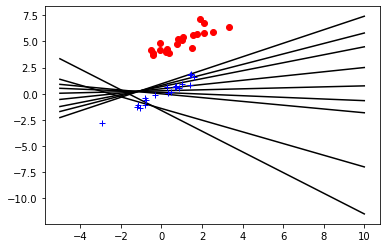

----- Perceptron_l2() started -----
err(1) = 42.525797 15
err(2) = 23.390380 19
err(3) = 20.002380 19
err(4) = 18.941001 19
err(5) = 18.240495 19
err(6) = 17.612320 19
err(7) = 17.013526 19
err(8) = 16.437148 19
err(9) = 15.881513 18
err(10) = 15.345749 17
err(11) = 14.829122 15
err(12) = 14.330941 15
err(13) = 13.850542 15
err(14) = 13.387286 15
err(15) = 12.940558 14
err(16) = 12.509764 14
err(17) = 12.094333 13
err(18) = 11.693713 13
err(19) = 11.307373 13
err(20) = 10.934802 12
err(21) = 10.575506 10
err(22) = 10.229009 10
err(23) = 9.894854 10
err(24) = 9.572598 9
err(25) = 9.261816 8
err(26) = 8.962097 6
err(27) = 8.673046 4
err(28) = 8.394281 4
err(29) = 8.125435 3
err(30) = 7.866154 3
err(31) = 7.616095 3
err(32) = 7.374929 3
err(33) = 7.142339 3
err(34) = 6.918019 3
err(35) = 6.701674 2
err(36) = 6.493019 2
err(37) = 6.291780 2
err(38) = 6.097693 2
err(39) = 5.910502 1
err(40) = 5.729961 0


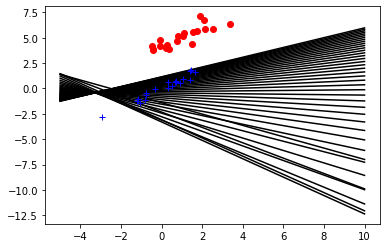

err(1) = 190.000000 -9, w= 0.423541 0.174276 0.313685, |w|=0.555119, |w23|=0.358846
err(2) = 190.000000 -9, w= 0.403372 0.172188 0.311725, |w|=0.538080, |w23|=0.356120
err(3) = 190.000000 -8, w= 0.383210 0.170101 0.309767, |w|=0.521287, |w23|=0.353397
err(4) = 190.000000 -8, w= 0.363057 0.168014 0.307809, |w|=0.504763, |w23|=0.350678
err(5) = 190.000000 -8, w= 0.342912 0.165928 0.305852, |w|=0.488535, |w23|=0.347962
err(6) = 174.000000 -8, w= 0.323775 0.160899 0.301097, |w|=0.470508, |w23|=0.341391
err(7) = 190.000000 -7, w= 0.303645 0.158816 0.299143, |w|=0.454873, |w23|=0.338687
err(8) = 174.000000 -7, w= 0.284524 0.153790 0.294390, |w|=0.437345, |w23|=0.332140
err(9) = 190.000000 -6, w= 0.264410 0.151710 0.292438, |w|=0.422432, |w23|=0.329448
err(10) = 174.000000 -7, w= 0.245304 0.146686 0.287688, |w|=0.405531, |w23|=0.322927
err(11) = 190.000000 -5, w= 0.225206 0.144609 0.285740, |w|=0.391506, |w23|=0.320248
err(12) = 174.000000 -6, w= 0.206116 0.139589 0.280992, |w|=0.375400, |w23

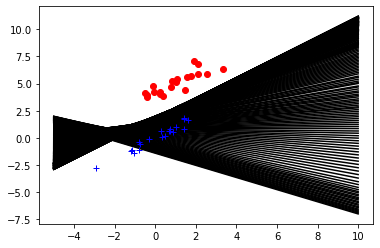

In [7]:
Perceptron_mis_yx(y,x,w,n_epoch,eta)
Perceptron_l2(y,x,w,n_epoch,eta)
SVM(y,x,w,n_epoch,eta)